In [1]:
import sys
import cv2
import numpy as np
import random

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

# FT(Fourier Formation) - 디지털 처리(DFT)

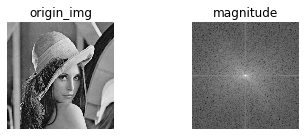

In [3]:
origin_img = cv2.imread('lenna.bmp', 0).astype(np.float32)   # gray scale , 0~1 사이의 값으로 만들기 위해 float32로 바꿈
origin_img = origin_img / 255
 
fft = cv2.dft(origin_img, flags=cv2.DFT_COMPLEX_OUTPUT)


shifted = np.fft.fftshift(fft, axes=[0,1])
magnitude = cv2.magnitude(shifted[:,:,0], shifted[:,:,1])
magnitude = np.log(magnitude)


plt.figure(figsize=(8,2))
plt.subplot(131)
plt.axis('off')
plt.title('origin_img')
plt.imshow(origin_img, cmap='gray')
plt.subplot(132)
plt.axis('off')
plt.title('magnitude')
plt.imshow(magnitude, cmap='gray')
plt.tight_layout()

# 엣지의 방향성을 알수 있게 해주는 주파수 그래프

# shift 시키는 이유 -> 저주파 성분들만 가운데로 모아서 쉽게  처리할 수 있게 하려고

In [66]:
origin_img = cv2.imread('ft03.png', 0).astype(np.float32)   # gray scale , 0~1 사이의 값으로 만들기 위해 float32로 바꿈
origin_img = origin_img / 255
print(origin_img.shape) 
fft = cv2.dft(origin_img, flags=cv2.DFT_COMPLEX_OUTPUT)


print(fft.shape)
# print(fft)

(100, 100)
(100, 100, 2)


(100, 100, 2)
(100, 100)


(array([9.999e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  913.2, 1826.4, 2739.6, 3652.8, 4566. , 5479.2, 6392.4,
        7305.6, 8218.8, 9132. ], dtype=float32),
 <a list of 10 Patch objects>)

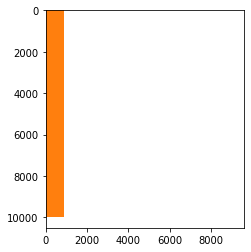

In [62]:
shifted = np.fft.fftshift(fft, axes = [0,1])

print(shifted.shape)
# print(shifted)
magnitude = cv2.magnitude(shifted[:,:,0], shifted[:,:,1]) # 첫번째 지수부(크기) / 두번째 허수부(각도) 
# magnitude = np.log(magnitude)



print(magnitude.shape)  # 10 x 10 행렬
# print(magnitude)
plt.imshow(magnitude, cmap = 'gray')
# print(np.min(magnitude))

# 너무 작은 값과 너무 큰 값들의 차이가 너무 커서 그 간격을 줄이는 것. 차이를 눈으로 보려고                                 
# 모든 간격을 0 ~ 11.7로 줄임 -> 매우 어두운 것들도 구분돼서 보임.
# 히스토그램으로 그리면 대다수의 값이 0에 가까움.    

plt.hist( magnitude.flatten() )  
# print(np.max(magnitude)
# print(np.log(np.max(magnitude)))  
plt.hist( magnitude.flatten() )   

In [63]:
print(magnitude)

[[6.1439060e-08 1.8265324e-07 2.6863450e-08 ... 1.1920929e-07
  2.6863450e-08 1.8265324e-07]
 [7.7089363e-01 4.3352076e-01 2.8434598e-01 ... 7.5568211e-01
  2.8434595e-01 4.3352073e-01]
 [9.8422939e-01 5.5349261e-01 3.6303532e-01 ... 9.6480840e-01
  3.6303532e-01 5.5349261e-01]
 ...
 [4.8390117e-01 2.7212733e-01 1.7848812e-01 ... 4.7435290e-01
  1.7848809e-01 2.7212733e-01]
 [9.8422951e-01 5.5349261e-01 3.6303532e-01 ... 9.6480840e-01
  3.6303532e-01 5.5349261e-01]
 [7.7089363e-01 4.3352073e-01 2.8434595e-01 ... 7.5568187e-01
  2.8434598e-01 4.3352076e-01]]


In [64]:
magnitude = np.log(magnitude + 1)

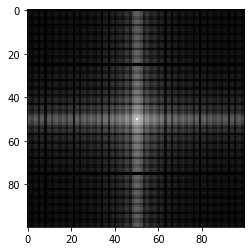

In [65]:
plt.imshow(magnitude,cmap = 'gray')

# 주파수로 만든 도메인을 다시 원래 이미지 도메인으로

(512, 512, 2)
(512, 512, 2)


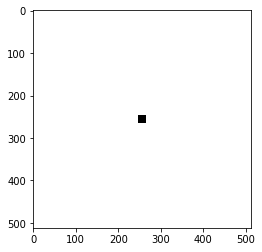

In [114]:
img = cv2.imread('lenna.bmp',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)             # 가운데가 저주파성분이 될 수 있도록 shift를 시킴.
rows, cols = img.shape
crow,ccol = int(rows/2), int(cols/2)         # 중심점을 구하겠다. -> 마스크 영상을 만들기 위해서

mask = np.zeros((rows,cols,2),np.uint8)      # 마스크는 전부 0으로 이루어져있고, 크기는 원본영상 크기로,,
mask[crow-10:crow+10, ccol-10:ccol+10] = 1   # 마스크 크기를 작게하면, 고주파가 거의다 사라짐 -> 매우 흐려짐

mask = 1 - mask   # 고주파 성분만 남기기

print(mask.shape)
print(dft_shift.shape)
plt.imshow(mask[:,:,0], cmap = 'gray')  # 이것은 1차원이나 3차원이어야하는데, 2차원이라 에러남

# 마스크로 고주파 성분을 제거 했기때문에, 영상이 흐려짐

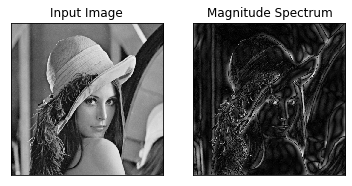

In [86]:
fshift = dft_shift * mask  # (원소 x 원소임)


f_ishift = np.fft.ifftshift(fshift)   # 가운데로 모인 것을 다시 구석으로 보내는 것 (역으로)
img_back = cv2.idft(f_ishift)  
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])


plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# 특정 마스크를 직접 그림판으로 만들었을때

- 원하는 부분의 주파수만 얻고 싶을때

(512, 512, 2)


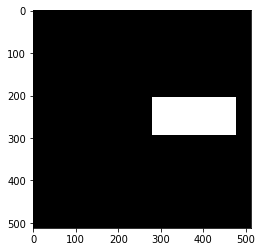

In [101]:
img = cv2.imread('lenna.bmp',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)            
rows, cols = img.shape
crow,ccol = int(rows/2), int(cols/2)         # 중심점을 구하겠다. -> 마스크 영상을 만들기 위해서

mask = np.zeros((rows,cols,2),np.uint8)      # 마스크는 전부 0으로 이루어져있고, 크기는 원본영상 크기로,,

mask0 = cv2.imread('mask01.png', 0) / 255
mask[:,:,0] = mask0
mask[:,:,1] = mask0 

g = np.dstack((mask0, mask0))  # 두 2차원행렬을 channel로 붙임

print(g.shape)
# print(mask0.shape)
# print(dft_shift.shape)
plt.imshow(g[:,:,1], cmap = 'gray')  # 이것은 1차원이나 3차원이어야하는데, 2차원이라 에러남

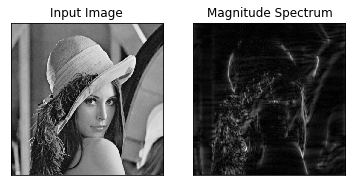

In [102]:
fshift = dft_shift * g  # (원소 x 원소임)


f_ishift = np.fft.ifftshift(fshift)   # 가운데로 모인 것을 다시 구석으로 보내는 것 (역으로)
img_back = cv2.idft(f_ishift)  
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])


plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()